In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import font_manager, rc 

font_name=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name) 

In [3]:
train = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/구내식당 식사 인원 예측/train.csv")
test = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/구내식당 식사 인원 예측/test.csv")
submission = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/구내식당 식사 인원 예측/sample_submission.csv")

In [4]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [6]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


In [8]:
train[train["일자"] == "2018-06-01"]["요일"]
train.loc[train["일자"] == "2018-06-01", "요일"] = "금"
train[train["일자"] == "2018-06-01"]["요일"]

573    금
Name: 요일, dtype: object

조식메뉴는 주요한 내용이 아니라고 판단

In [9]:
df = train
del df["조식메뉴"]
df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


encoding

In [10]:
df=df.replace(['월', '화', '수', '목', '금'], [1, 2, 3, 4, 5])
df.head(5)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,1,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,3,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,4,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,5,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


변수 추가

In [11]:
df['일자'] = pd.to_datetime(df['일자'])
df['월']=df['일자'].dt.month
df['일']=df['일자'].dt.day
df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,월,일
0,2016-02-01,1,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2,1
1,2016-02-02,2,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,2
2,2016-02-03,3,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2,3
3,2016-02-04,4,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2,4
4,2016-02-05,5,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,3,2983,75,198,4,391.0,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,1,20
1201,2021-01-21,4,2983,92,231,462,351.0,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,1,21
1202,2021-01-22,5,2983,255,248,1,303.0,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,1,22
1203,2021-01-25,1,2983,107,153,616,327.0,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,1,25


## 석식계 예측

In [12]:
dinner = []
for day in range(len(df)):
    tmp = df.iloc[day, 8].split(' ') # 공백으로 문자열 구분 
    tmp = ' '.join(tmp).split()    # 빈 원소 삭제
    search = '('   # 원산지 정보는 삭제
    
    for menu in tmp:
        if ('(' in menu)&(menu[0]=='(')&(menu[-1]==')'):
            tmp.remove(menu)
    dinner.append(tmp) 

In [13]:
np.array(train[ (train.index > 1064) & (train.index < 1069)][["일자", "중식메뉴"]])

array([['2020-06-11',
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 매운소고기국  굴비구이  토마토프리타타  도라지오이무침  배추겉절이 (배추국내,고추가루:중국산) '],
       ['2020-06-12',
        '돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국  양파링카레튀김  모듬어묵볶음  참나물생채 요구르트 포기김치 (김치:국내산) '],
       ['2020-07-01',
        '쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드*딸기요거트 '],
       ['2020-07-02',
        '쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈 ']],
      dtype=object)

In [14]:
df_dinner = df[["일자", "월", "일", "요일", "본사정원수", "본사휴가자수", "본사출장자수", "본사시간외근무명령서승인건수", "현본사소속재택근무자수", "석식메뉴", "석식계"]]
num=[]
for i in range(len(df_dinner)):
    num.append(len(dinner[i]))
df_dinner["반찬수"]=num

<ipython-input-14-dc18c2d04a4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dinner["반찬수"]=num


In [15]:
df_dinner=df_dinner[df_dinner["석식계"]!=0]
df_dinner

,일자,월,일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,석식메뉴,석식계,반찬수
0,2016-02-01,2,1,1,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",331.0,6
1,2016-02-02,2,2,2,2601,50,173,319,0.0,"콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",560.0,6
2,2016-02-03,2,3,3,2601,56,180,111,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",573.0,6
3,2016-02-04,2,4,4,2601,104,220,355,0.0,"미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",525.0,6
4,2016-02-05,2,5,5,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",330.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,1,20,3,2983,75,198,4,391.0,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,421.0,6
1201,2021-01-21,1,21,4,2983,92,231,462,351.0,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,353.0,6
1202,2021-01-22,1,22,5,2983,255,248,1,303.0,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,217.0,6
1203,2021-01-25,1,25,1,2983,107,153,616,327.0,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,502.0,6


C:\Users\yhg31\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yhg31\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

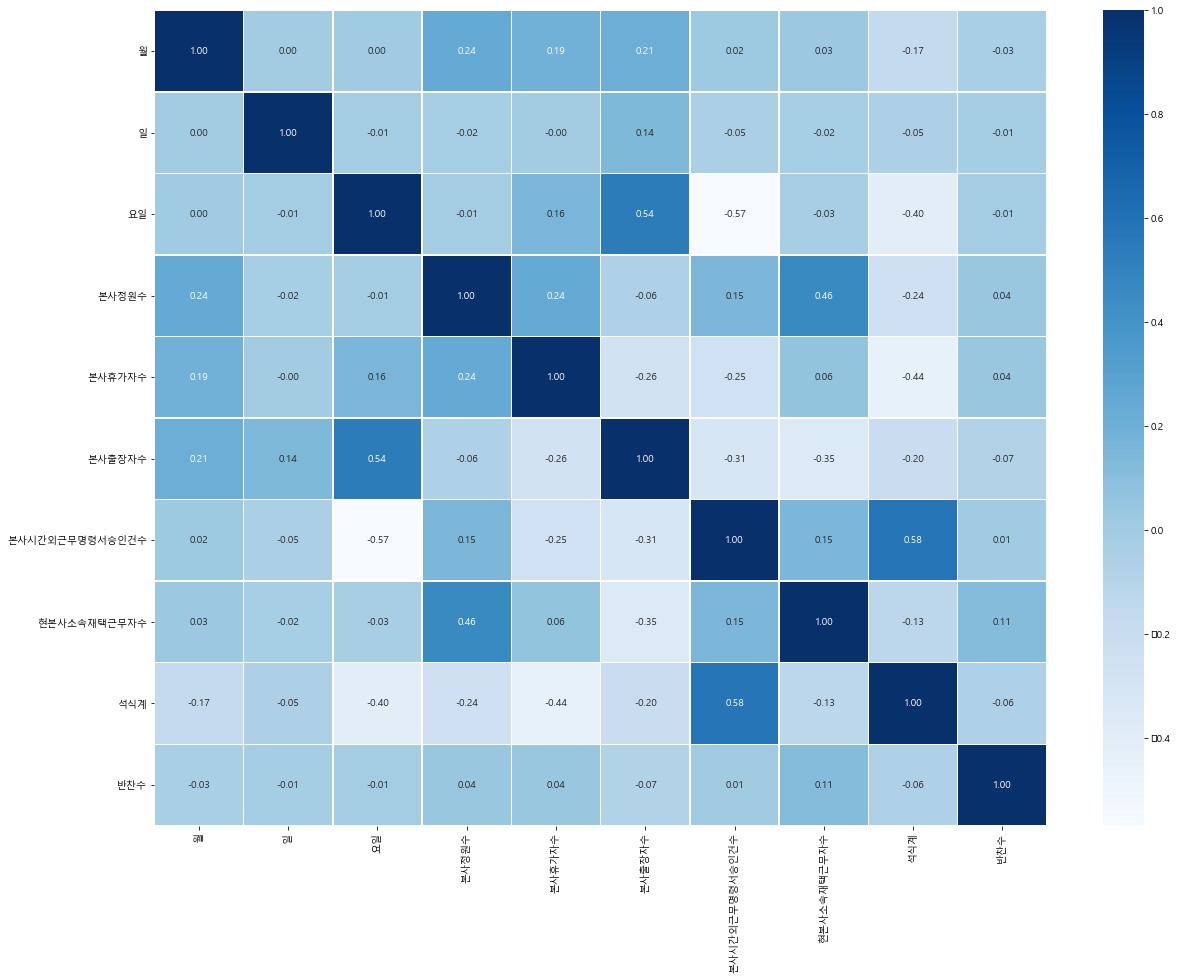

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20, 15))
sns.heatmap(data = df_dinner.corr(), annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')

In [17]:
dinner_corr = df_dinner.corr()
dinner_high = dinner_corr[(dinner_corr["석식계"]>0.3) | (dinner_corr["석식계"]< -0.3)]
dinner_high

,월,일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,석식계,반찬수
요일,0.001469,-0.005261,1.000000,-0.006490,0.160184,0.541438,-0.568894,-0.027300,-0.400632,-0.008378
본사휴가자수,0.191542,-0.000948,0.160184,0.244688,1.000000,-0.264451,-0.247164,0.063344,-0.444938,0.043158
본사시간외근무명령서승인건수,0.019723,-0.046810,-0.568894,0.148946,-0.247164,-0.308851,1.000000,0.148343,0.579223,0.009716
석식계,-0.165372,-0.051283,-0.400632,-0.243487,-0.444938,-0.203356,0.579223,-0.125735,1.000000,-0.056926


## 비율로 변환한 변수

In [18]:
df_dinner["본사휴가자비율"] = df_dinner["본사휴가자수"] / df_dinner["본사정원수"] 
df_dinner["본사출장자비율"] = df_dinner["본사출장자수"] / df_dinner["본사정원수"] 
df_dinner["본사시간외근무자비율"] = df_dinner["본사시간외근무명령서승인건수"] / df_dinner["본사정원수"] 
df_dinner["본사재택근무자비율"] = df_dinner["현본사소속재택근무자수"] / df_dinner["본사정원수"] 

df_dinner["본사근무자수"] = df_dinner["본사정원수"] - df_dinner["본사휴가자수"] - df_dinner["현본사소속재택근무자수"] 
df_dinner["본사근무자비율"] = df_dinner["본사근무자수"] / df_dinner["본사정원수"] 

In [19]:
df_dinner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 1204
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1162 non-null   datetime64[ns]
 1   월               1162 non-null   int64         
 2   일               1162 non-null   int64         
 3   요일              1162 non-null   int64         
 4   본사정원수           1162 non-null   int64         
 5   본사휴가자수          1162 non-null   int64         
 6   본사출장자수          1162 non-null   int64         
 7   본사시간외근무명령서승인건수  1162 non-null   int64         
 8   현본사소속재택근무자수     1162 non-null   float64       
 9   석식메뉴            1162 non-null   object        
 10  석식계             1162 non-null   float64       
 11  반찬수             1162 non-null   int64         
 12  본사휴가자비율         1162 non-null   float64       
 13  본사출장자비율         1162 non-null   float64       
 14  본사시간외근무자비율      1162 non-null   float64       
 15  본사재택

In [20]:
x=df_dinner.iloc[:, [1, 2, 3, 4, 11, 12, 13, 14, 15, 17]]
y=df_dinner.iloc[:, [10]]

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((813, 10), (349, 10), (813, 1), (349, 1))

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
fr = RandomForestRegressor()
fr.fit(x_train,y_train)
print("\nRandomForest score : {:.3f}".format(fr.score(x_test, y_test)))

y_pred=fr.predict(x_test)
print("RandomForest mae : {:.3f}".format(mean_absolute_error(y_test, y_pred)))


from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 0)
gb.fit(x_train,y_train)
print("\nGradientBoosting score : {:.3f}".format(gb.score(x_test, y_test)))

y_pred=gb.predict(x_test)
print("GradientBoosting mae : {:.3f}".format(mean_absolute_error(y_test, y_pred)))


import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
print("\nxgboost score : {:.3f}".format(xgb.score(x_test, y_test)))

y_pred=xgb.predict(x_test)
print("xgboost mae : {:.3f}".format(mean_absolute_error(y_test, y_pred)))


import lightgbm as lgb
lgb = lgb.LGBMRegressor()
lgb.fit(x_train, y_train)
print("\nlightgbm score : {:.3f}".format(lgb.score(x_test, y_test)))

y_pred=lgb.predict(x_test)
print("lightgbm mae : {:.3f}".format(mean_absolute_error(y_test, y_pred)))

<ipython-input-22-0441ba9892c7>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fr.fit(x_train,y_train)



RandomForest score : 0.638
RandomForest mae : 48.225


C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



GradientBoosting score : 0.683
GradientBoosting mae : 44.804

xgboost score : 0.651
xgboost mae : 46.806

lightgbm score : 0.707
lightgbm mae : 44.273


In [23]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor(random_state = 0)

params = {
    'n_estimators' : [439],
    'learning_rate' : [0.035]
}
cv = GridSearchCV(estimator=gb, param_grid=params, cv=5, scoring = 'neg_mean_absolute_error')
cv.fit(x_train, y_train)

print("score : {:.3f}".format(cv.score(x_test, y_test)))
print("최적 파라미터 : ", cv.best_params_)
print("최적 MAE : ", cv.best_score_)

C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

score : -44.826
최적 파라미터 :  {'learning_rate': 0.035, 'n_estimators': 439}
최적 MAE :  -48.24516601417936


In [24]:
cv.fit(x_train, y_train)

y_pred=cv.predict(x_test)
print("GradientBoosting mae : {:.3f}".format(mean_absolute_error(y_test, y_pred)))

C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

GradientBoosting mae : 44.826


## test 데이터 적용

In [25]:
dinner = []
for day in range(len(test)):
    tmp = test.iloc[day, 8].split(' ') # 공백으로 문자열 구분 
    tmp = ' '.join(tmp).split()    # 빈 원소 삭제
    search = '('   # 원산지 정보는 삭제
    
    for menu in tmp:
        if ('(' in menu)&(menu[0]=='(')&(menu[-1]==')'):
            tmp.remove(menu)
    dinner.append(tmp) 

In [26]:
num=[]
for i in range(len(test)):
    num.append(len(dinner[i]))
test["반찬수"]=num

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
 10  반찬수             50 non-null     int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.4+ KB


In [28]:
del test["조식메뉴"]
del test["중식메뉴"]
del test["석식메뉴"]

In [29]:
test['일자'] = pd.to_datetime(test['일자'])
test['월']=test['일자'].dt.month
test['일']=test['일자'].dt.day
test=test.replace(['월', '화', '수', '목', '금'], [1, 2, 3, 4, 5])
test

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,반찬수,월,일
0,2021-01-27,3,2983,88,182,5,358.0,7,1,27
1,2021-01-28,4,2983,104,212,409,348.0,7,1,28
2,2021-01-29,5,2983,270,249,0,294.0,7,1,29
3,2021-02-01,1,2924,108,154,538,322.0,7,2,1
4,2021-02-02,2,2924,62,186,455,314.0,7,2,2
5,2021-02-03,3,2924,59,199,5,286.0,7,2,3
6,2021-02-04,4,2924,61,211,476,288.0,7,2,4
7,2021-02-05,5,2924,169,252,0,256.0,7,2,5
8,2021-02-08,1,2924,88,174,690,329.0,7,2,8
9,2021-02-09,2,2924,94,183,542,329.0,7,2,9


In [30]:
test["본사휴가자비율"] = test["본사휴가자수"] / test["본사정원수"] 
test["본사출장자비율"] = test["본사출장자수"] / test["본사정원수"] 
test["본사시간외근무자비율"] = test["본사시간외근무명령서승인건수"] / test["본사정원수"] 
test["본사재택근무자비율"] = test["현본사소속재택근무자수"] / test["본사정원수"] 

test["본사근무자수"] = test["본사정원수"] - test["본사휴가자수"] - test["현본사소속재택근무자수"] 
test["본사근무자비율"] = test["본사근무자수"] / test["본사정원수"] 

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              50 non-null     datetime64[ns]
 1   요일              50 non-null     int64         
 2   본사정원수           50 non-null     int64         
 3   본사휴가자수          50 non-null     int64         
 4   본사출장자수          50 non-null     int64         
 5   본사시간외근무명령서승인건수  50 non-null     int64         
 6   현본사소속재택근무자수     50 non-null     float64       
 7   반찬수             50 non-null     int64         
 8   월               50 non-null     int64         
 9   일               50 non-null     int64         
 10  본사휴가자비율         50 non-null     float64       
 11  본사출장자비율         50 non-null     float64       
 12  본사시간외근무자비율      50 non-null     float64       
 13  본사재택근무자비율       50 non-null     float64       
 14  본사근무자수          50 non-null     float64       
 15  본사근무자비율 

In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 1204
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   월           1162 non-null   int64  
 1   일           1162 non-null   int64  
 2   요일          1162 non-null   int64  
 3   본사정원수       1162 non-null   int64  
 4   반찬수         1162 non-null   int64  
 5   본사휴가자비율     1162 non-null   float64
 6   본사출장자비율     1162 non-null   float64
 7   본사시간외근무자비율  1162 non-null   float64
 8   본사재택근무자비율   1162 non-null   float64
 9   본사근무자비율     1162 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 99.9 KB


In [33]:
x_data=test.iloc[:, [8, 9, 1, 2, 7, 10, 11, 12, 13, 15]]
x_data

,월,일,요일,본사정원수,반찬수,본사휴가자비율,본사출장자비율,본사시간외근무자비율,본사재택근무자비율,본사근무자비율
0,1,27,3,2983,7,0.029501,0.061012,0.001676,0.120013,0.850486
1,1,28,4,2983,7,0.034864,0.071069,0.137110,0.116661,0.848475
2,1,29,5,2983,7,0.090513,0.083473,0.000000,0.098558,0.810929
3,2,1,1,2924,7,0.036936,0.052668,0.183995,0.110123,0.852941
4,2,2,2,2924,7,0.021204,0.063611,0.155609,0.107387,0.871409
5,2,3,3,2924,7,0.020178,0.068057,0.001710,0.097811,0.882011
6,2,4,4,2924,7,0.020862,0.072161,0.162791,0.098495,0.880643
7,2,5,5,2924,7,0.057798,0.086183,0.000000,0.087551,0.854651
8,2,8,1,2924,7,0.030096,0.059508,0.235978,0.112517,0.857387
9,2,9,2,2924,7,0.032148,0.062585,0.185363,0.112517,0.855335


In [34]:
real_pred = cv.predict(x_data)
real_pred = real_pred.astype('int64')
real_pred

array([361, 396, 252, 421, 457, 387, 458, 330, 618, 539, 178, 664, 616,
       413, 513, 349, 663, 589, 353, 508, 287, 614, 422, 491, 359, 730,
       697, 406, 518, 302, 697, 539, 427, 447, 285, 619, 578, 358, 417,
       269, 602, 572, 376, 399, 267, 605, 551, 392, 439, 265], dtype=int64)

In [35]:
submission['석식계']=real_pred

In [36]:
submission

,일자,중식계,석식계
0,2021-01-27,0,361
1,2021-01-28,0,396
2,2021-01-29,0,252
3,2021-02-01,0,421
4,2021-02-02,0,457
5,2021-02-03,0,387
6,2021-02-04,0,458
7,2021-02-05,0,330
8,2021-02-08,0,618
9,2021-02-09,0,539


In [37]:
submission.to_csv("구내식당 식수 인원 예측 AI 경진대회(석식계).csv")